<a href="https://colab.research.google.com/github/Shavkatshoniyozov/Data_Science/blob/main/Tashkent_home_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
URL = 'https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv'
df = pd.read_csv(URL)
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [ ]:
data =df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [ ]:
data

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18,1,4,11000


# **Filtering**

In [ ]:
df=df[df.year>=2010] # 2010-yildan keyin chiqqan mashinalarni saqlab qolamiz
df=df[df.transmission!='Other'] # Faqat avtomat, mexanik va yarim-avtomat mashinalarni olib qolamiz

# **Size column filtering**

In [ ]:
data[data['size']=='Площадьземли:1сот'].index.values #String value index find

array([5347])

In [ ]:
data.drop(index=[5347], inplace=True) #Drop with index (string value)

In [ ]:
data['size'] = pd.to_numeric(data['size']) #converting object to numeric data

# **Price column filtering**

In [ ]:
data['price']=pd.to_numeric(data['price']) #object to Numerical data type

In [ ]:
data['price'] = data['price'].replace('Договорная', np.nan) #String values replace

In [ ]:
data = data[data["price"].str.contains("Договорная") == False] #string value drop 

AttributeError: ignored

In [ ]:
data[data['price']=='Договорная']

In [ ]:
data.describe()

In [ ]:
data = data[data['price']<200000]

In [ ]:
data['district'].value_counts(ascending=False)

In [ ]:
a = data[data['price']<200000].index.values

In [ ]:
data.info()

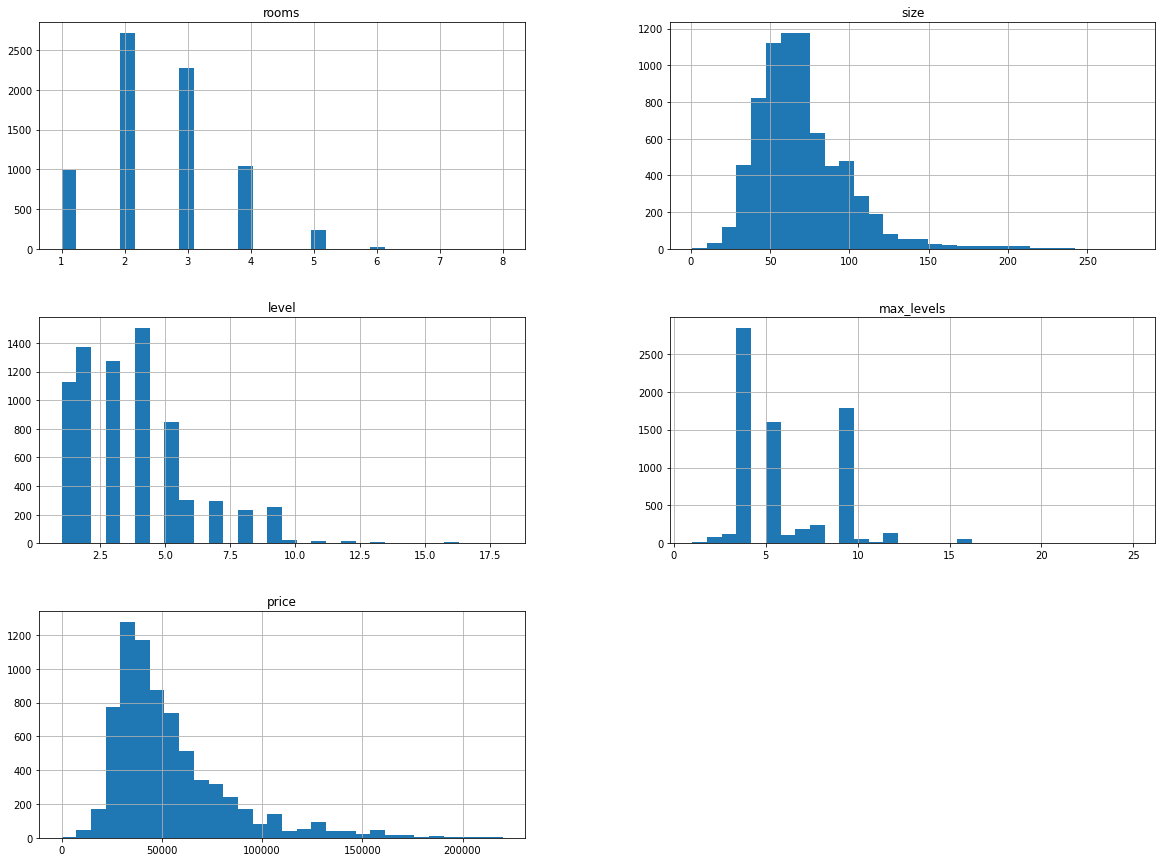

In [ ]:
%matplotlib inline
data.hist(bins=30, figsize=(20,15))
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = housing, x='size', y='price', s=70)
#sns.scatterplot(data=data, x='size', y='price')
plt.show()

In [ ]:
housing = data[data.district == 'Чиланзарский']


In [ ]:
housing.drop('location', axis=1, inplace=True)

In [ ]:
x=housing['size']

In [ ]:
y=housing['price']

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x=x, y=y, line_kws={'color':'red'}, scatter=True)
plt.show()

In [ ]:
housing.head()

In [ ]:
tepa = np.sum((x - x.mean())*(y-y.mean()))

In [ ]:
past = np.square(x-x.mean()).sum()

In [ ]:
b = tepa/past
b

In [ ]:
a = y.mean()-(b)*(x.mean())
a

In [ ]:
housing['predicted'] = a+b*x

In [ ]:
housing.head()

In [ ]:
mae = np.sum(np.absolute(housing.predicted-y))/len(y)
mae

In [ ]:
rmse = np.sqrt(np.square(housing.predicted-y).sum()/len(x))
rmse

# **sklearn**


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
url = 'https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv'

In [ ]:
data = pd.read_csv(url, index_col = 0)
data.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7278 entries, 0 to 7464
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7278 non-null   object 
 1   rooms       7278 non-null   int64  
 2   size        7278 non-null   float64
 3   level       7278 non-null   int64  
 4   max_levels  7278 non-null   int64  
 5   price       7278 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 398.0+ KB


In [ ]:
#x = np.asanyarray(data['size']) # save size column as an numpy array
#x

In [ ]:
x = data['size'].to_numpy()  # save size column as an numpy array
x

array([57., 52., 42., ..., 64., 18., 30.])

In [ ]:
y = data['price'].to_numpy()
y

array([52000., 56000., 37000., ..., 40000., 11000., 22914.])

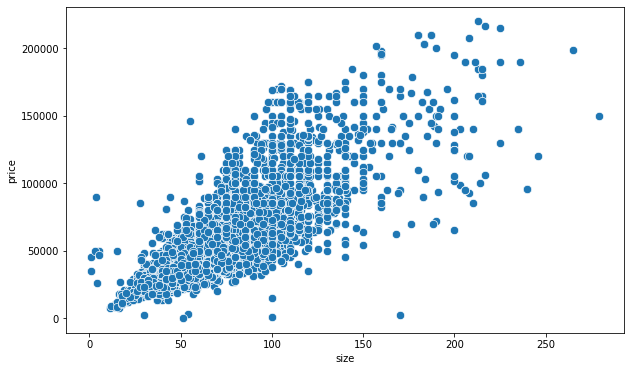

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='size', y='price', s=70)
plt.show()

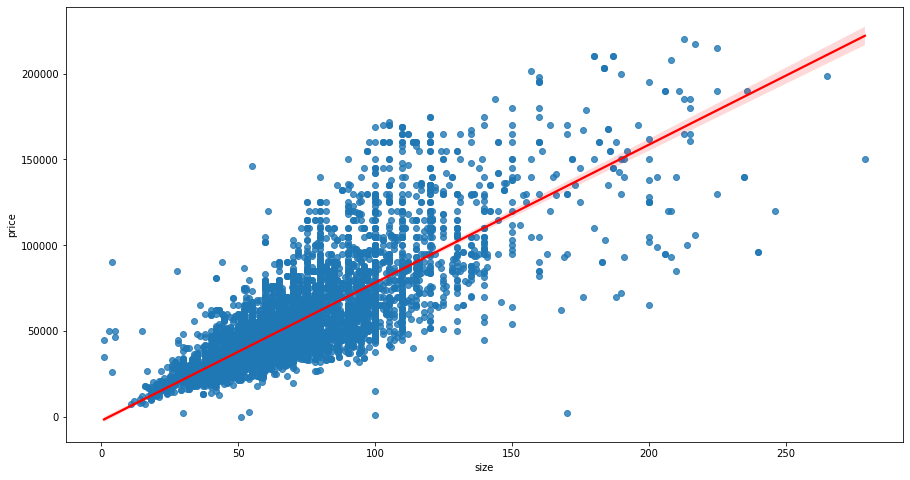

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(data=data, x='size', y='price', line_kws={'color':'red'})
plt.show()

In [ ]:
xmean = np.mean(x)
ymean = np.mean(y)

In [ ]:
coef = sum((x-xmean)*(y-ymean))/np.sum(np.square(x-xmean))  #coefficient (y = a + bx) find #b known as coefficient/slope
print(f"Coefficient={np.round(coef)}")

Coefficient=804.0


In [ ]:
intercept = ymean - (coef*xmean) #intercept (y = a + bx) find #a known as constant/intercept
intercept

-2291.4652986467627

In [ ]:
xtest = data.sample(10, random_state=21)['size'].to_numpy()
print(f'x test values={xtest}')
ytest = data.sample(10, random_state=21)['price'].to_numpy()
print(f'y test values={ytest}')

x test values=[40. 95. 78. 90. 39. 38. 71. 29. 60. 70.]
y test values=[ 29000. 126000.  45000.  45000.  27500.  26500.  62000.  24200.  43000.
  44000.]


In [ ]:
y_predicted = intercept + coef * xtest
np.round(y_predicted)

array([29873., 74099., 60429., 70079., 29069., 28265., 54801., 21028.,
       45955., 53996.])

In [ ]:
mae = sum(np.absolute(y_predicted - ytest))  /len(ytest)
mae

11993.885992850783

In [ ]:
rmse = np.sqrt((sum(np.square(y_predicted - ytest)))/len(ytest))
rmse

19332.845892524598

# **SK LA**

In [ ]:
data.shape

(7278, 6)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=21) # dividing data into train and test sets

In [ ]:
from sklearn import linear_model
LR_model =  linear_model.LinearRegression()  #calling Linear reg model as LR_model 

In [ ]:
x_train = np.asanyarray(train_set[['size']])
x_train

array([[74.],
       [70.],
       [60.],
       ...,
       [72.],
       [60.],
       [22.]])

In [ ]:
y_train = np.asanyarray(train_set[['price']])
y_train

array([[42000.],
       [38000.],
       [38000.],
       ...,
       [45000.],
       [46000.],
       [15500.]])

In [ ]:
LR_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
coef = LR_model.coef_[0][0]
cons = LR_model.intercept_[0]

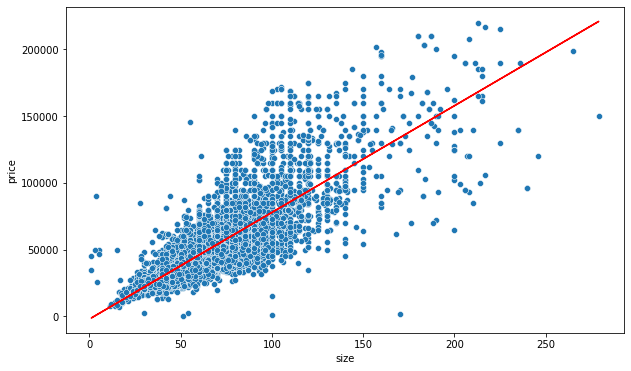

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x ='size', y='price')
plt.plot(x_train, cons + coef * x_train, '-r')
plt.show()

# **Modulni Baholash**

In [ ]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])
print(f'Tested Y values: {y_test}')
print(f'Tested X values: {x_test}')

In [ ]:
y_predict = LR_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, y_predict)
MSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f'Mean absolute error is {np.round(MAE, 2)}') #sklearn error calculation
print(f"Mean squared error is {round(MSE, 2)}")

Mean absolute error is 11949.03
Mean squared error is 17447.25


In [ ]:
print(f'Mean absolute error is {np.round(mae, 2)}') #manual calculation
print(f"Mean squared error is {round(rmse, 2)}")

Mean absolute error is 11993.89
Mean squared error is 19332.85


In [ ]:
comp = pd.DataFrame(y_predict)
comp.columns = ['y_test'] 
comp['y_original'] = pd.DataFrame(y_predicted)
comp.head(10)


,y_test,y_original
0,29977.556586,29873.029451
1,73923.438688,74099.209732
2,60340.166038,60429.299463
3,69928.358497,70078.647888
4,29178.540548,29068.917082
5,28379.524509,28264.804714
6,54747.053771,54800.512882
7,21188.380165,21027.793395
8,45957.877350,45955.276826
9,53948.037733,53996.400513
